In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout

In [3]:
# Carga y previsualización de los datos
df_train = pd.read_csv("../../data/raw/mitbih_train.csv", header=None)
df_test = pd.read_csv("../../data/raw/mitbih_test.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


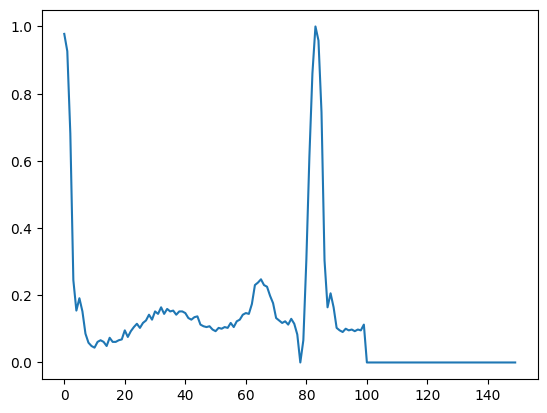

In [4]:
# Visualización del comportamiento de los datos
plt.plot(df_train.iloc[0,:150])

In [5]:
# Selección de vector de entrenamiento y vector de pruebas
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1].astype(int)

X_test  = df_test.values[:, :-1]
y_test  = df_test.values[:, -1].astype(int)

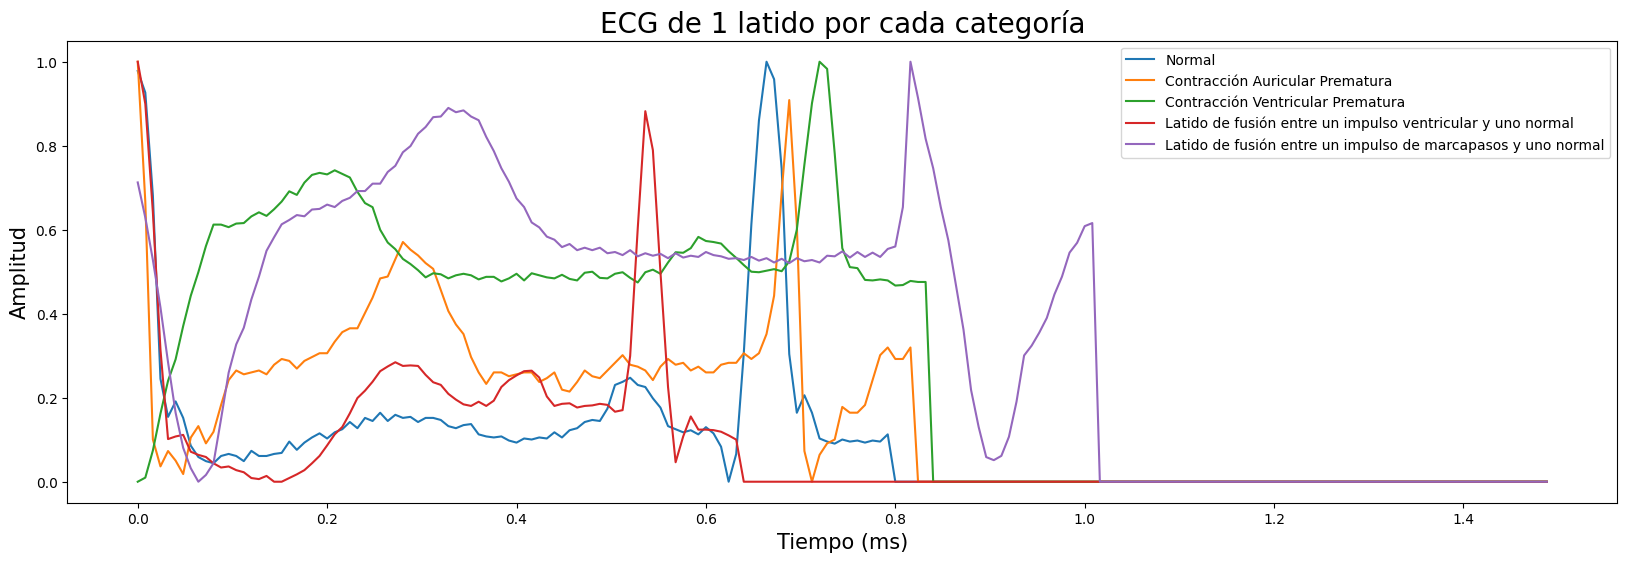

In [6]:
# Visualización de cada uno de los tipos de comportamiento cardiaco
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()
C2 = np.argwhere(y_train == 2).flatten()
C3 = np.argwhere(y_train == 3).flatten()
C4 = np.argwhere(y_train == 4).flatten()

x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X_train[C0, :][0], label="Normal")
plt.plot(x, X_train[C1, :][0], label="Contracción Auricular Prematura")
plt.plot(x, X_train[C2, :][0], label="Contracción Ventricular Prematura")
plt.plot(x, X_train[C3, :][0], label="Latido de fusión entre un impulso ventricular y uno normal")
plt.plot(x, X_train[C4, :][0], label="Latido de fusión entre un impulso de marcapasos y uno normal")
plt.legend()
plt.title("ECG de 1 latido por cada categoría", fontsize=20)
plt.ylabel("Amplitud", fontsize=15)
plt.xlabel("Tiempo (ms)", fontsize=15)
plt.show()

In [7]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

print(X_train.shape)
print(X_test.shape)

(87554, 187, 1)
(21892, 187, 1)


In [8]:
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(87554, 5)
(21892, 5)


In [9]:
input_shape = (X_train.shape[1], X_train.shape[2])

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\pablo\OneDrive\Documentos\Study\UAO\proyectos\ProyectoArritmiaUAO\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       183,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         1,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,677 (881.55 KB)

 Trainable params: 225,677 (881.55 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 135s 96ms/step - accuracy: 0.9205 - loss: 0.2878 - val_accuracy: 0.9588 - val_loss: 0.1472
Epoch 2/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 140s 102ms/step - accuracy: 0.9628 - loss: 0.1331 - val_accuracy: 0.9693 - val_loss: 0.1092
Epoch 3/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 187s 137ms/step - accuracy: 0.9702 - loss: 0.1054 - val_accuracy: 0.9761 - val_loss: 0.0879
Epoch 4/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 190s 139ms/step - accuracy: 0.9740 - loss: 0.0909 - val_accuracy: 0.9733 - val_loss: 0.0877
Epoch 5/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 195s 142ms/step - accuracy: 0.9753 - loss: 0.0845 - val_accuracy: 0.9805 - val_loss: 0.0692
Epoch 6/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 1171s 856ms/step - accuracy: 0.9791 - loss: 0.0724 - val_accuracy: 0.9809 - val_loss: 0.0682
Epoch 7/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 113s 82ms/step - accuracy: 0.9807 - loss: 0.0663 - val_accuracy: 0.9824 - val_loss: 0.0642
Epoch 8/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 117s 86ms/step - accu

In [ ]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en datos de prueba: {loss:.4f}")
print(f"Precisión en los datos de prueba: {accuracy:.4f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9863 - loss: 0.0488
Pérdida en datos de prueba: 0.0488
Precisión en los datos de prueba: 0.9863


In [14]:
# Predicción en datos de prueba 
y_pred_prueba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prueba, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step


In [23]:
print("\nResultados del modelo:")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Normal", "Auricular Prematura", "Ventricular Prematura", "Fusión Ventricular", "Fusión Marcapasos"]))



Resultados del modelo:
                       precision    recall  f1-score   support

               Normal       0.99      1.00      0.99     18118
  Auricular Prematura       0.93      0.77      0.85       556
Ventricular Prematura       0.95      0.97      0.96      1448
   Fusión Ventricular       0.90      0.72      0.80       162
    Fusión Marcapasos       0.99      0.99      0.99      1608

             accuracy                           0.99     21892
            macro avg       0.95      0.89      0.92     21892
         weighted avg       0.99      0.99      0.99     21892



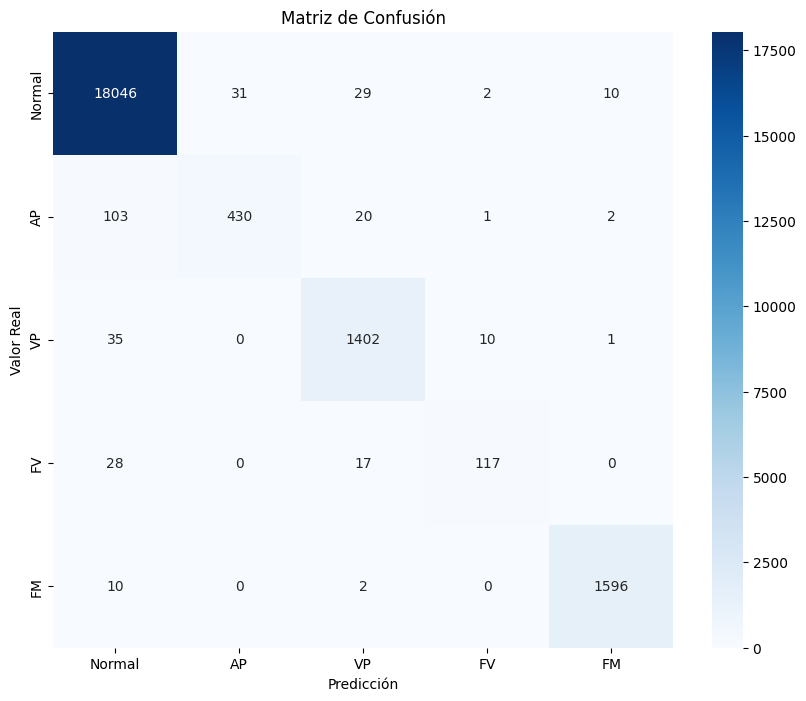

In [24]:
# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "AP", "VP", "FV", "FM"], yticklabels=["Normal", "AP", "VP", "FV", "FM"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

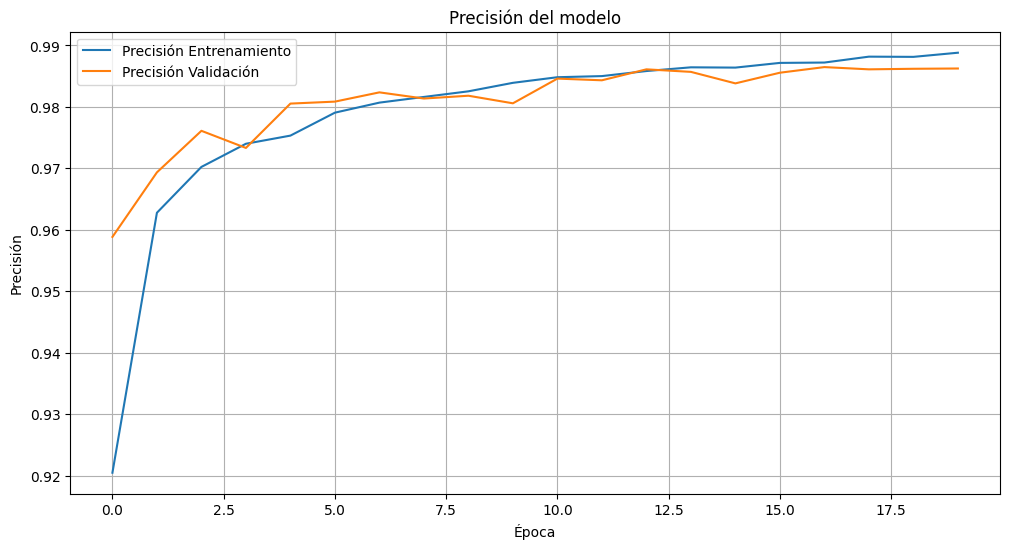

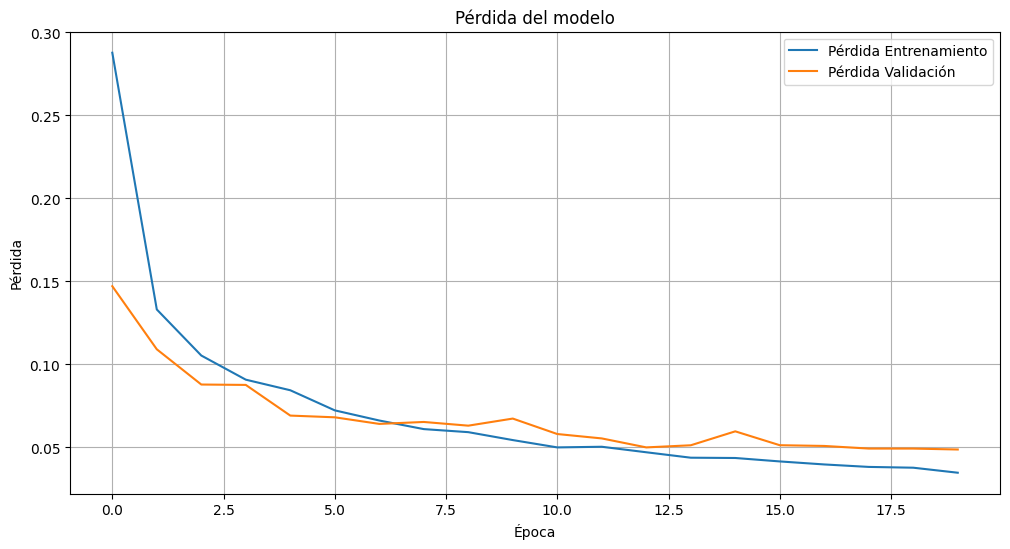

In [22]:
# Visualización de las métricas
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Se guarda el modelo entrenado
model.save('PrediccionArritmia.keras')